In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
#used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler as Scaler
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [3]:
#load data
data_set=pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")

# Exploring Data

In [4]:
data_set.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#rows x columns
data_set.shape

(768, 9)

In [7]:
#statistics of the data
data_set.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
#check duplicates
data_set.duplicated().sum()

0

In [9]:
#check null values
data_set.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa78d7f7fd0>,
      dtype=object)

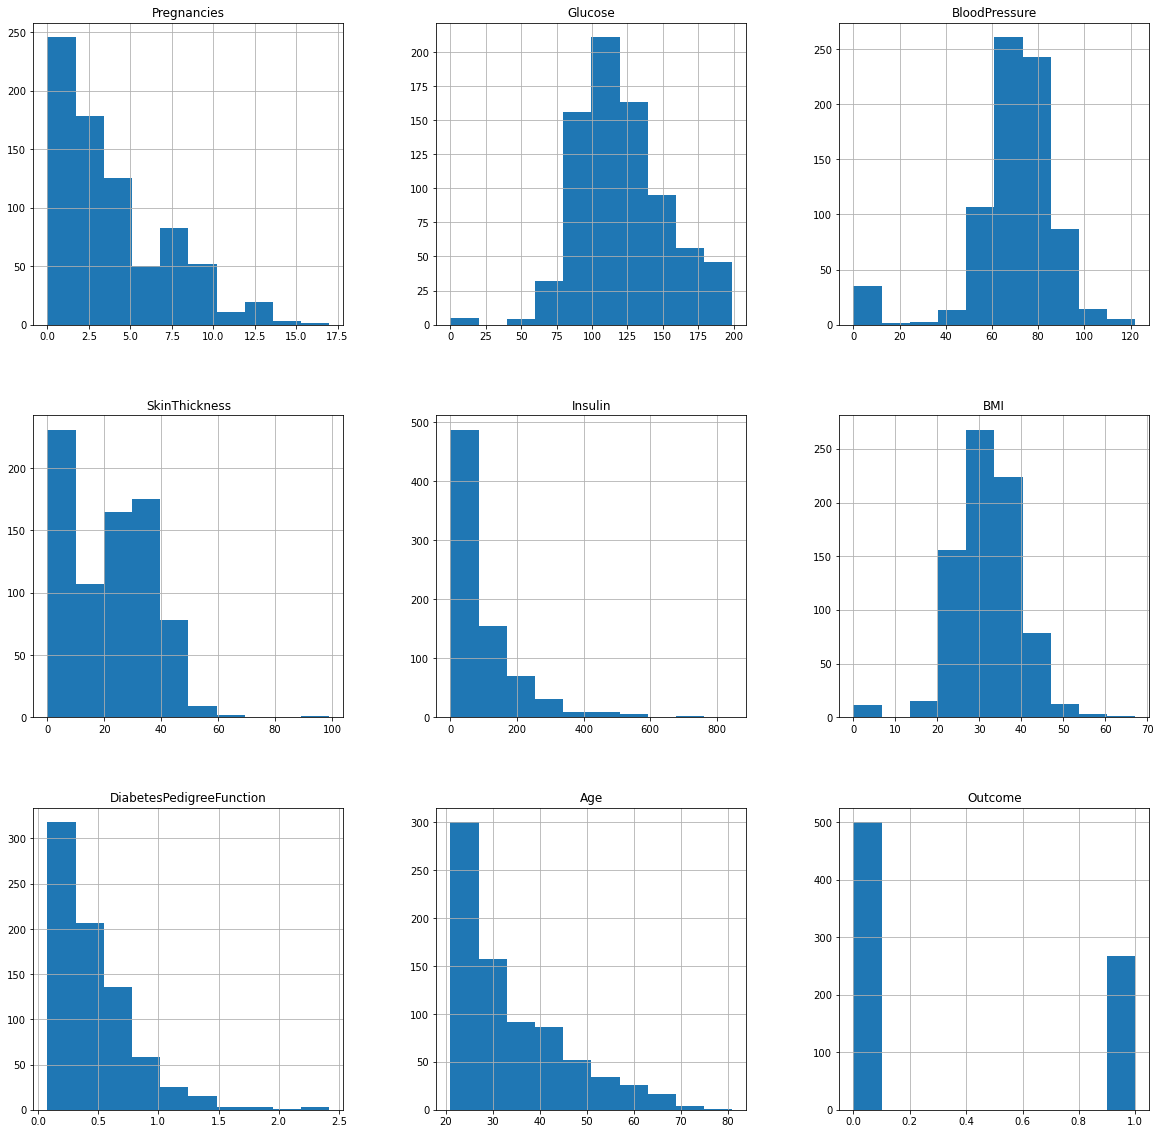

In [10]:
#data distribution? 
data_set.hist(figsize = (20,20))

# Data Cleaning

In [11]:
# Calculate the median value for BMI
median_BMI = data_set['BMI'].median()
print(median_BMI)
# Substitute it in the BMI column of the
# dataset where values are 0
data_set['BMI'] = data_set['BMI'].replace(
    to_replace=0, value=median_BMI)


32.0


In [12]:
# Calculate the median value for BloodPressure
median_BD = data_set['BloodPressure'].median()
print(median_BD)
data_set['BloodPressure'] = data_set['BloodPressure'].replace(
    to_replace=0, value=median_BD)


72.0


In [13]:
# Calculate the median value for Glucose
median_Glucose = data_set['Glucose'].median()
print(median_Glucose)
data_set['Glucose'] = data_set['Glucose'].replace(
    to_replace=0, value=median_Glucose)


117.0


In [14]:
# Calculate the median value for SkinThickness
median_STH = data_set['SkinThickness'].median()
print(median_STH)
data_set['SkinThickness'] = data_set['SkinThickness'].replace(
    to_replace=0, value=median_STH)


23.0


In [15]:
# Calculate the median value for Insulin
median_Insulin = data_set['Insulin'].median()
print(median_Insulin)
data_set['Insulin'] = data_set['Insulin'].replace(
    to_replace=0, value=median_Insulin)


30.5


In [16]:
#how many women with 0 Pregnancies?
(data_set["Pregnancies"]==0).sum()

111

In [17]:
data_set.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# data visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa782a2d250>,
      dtype=object)

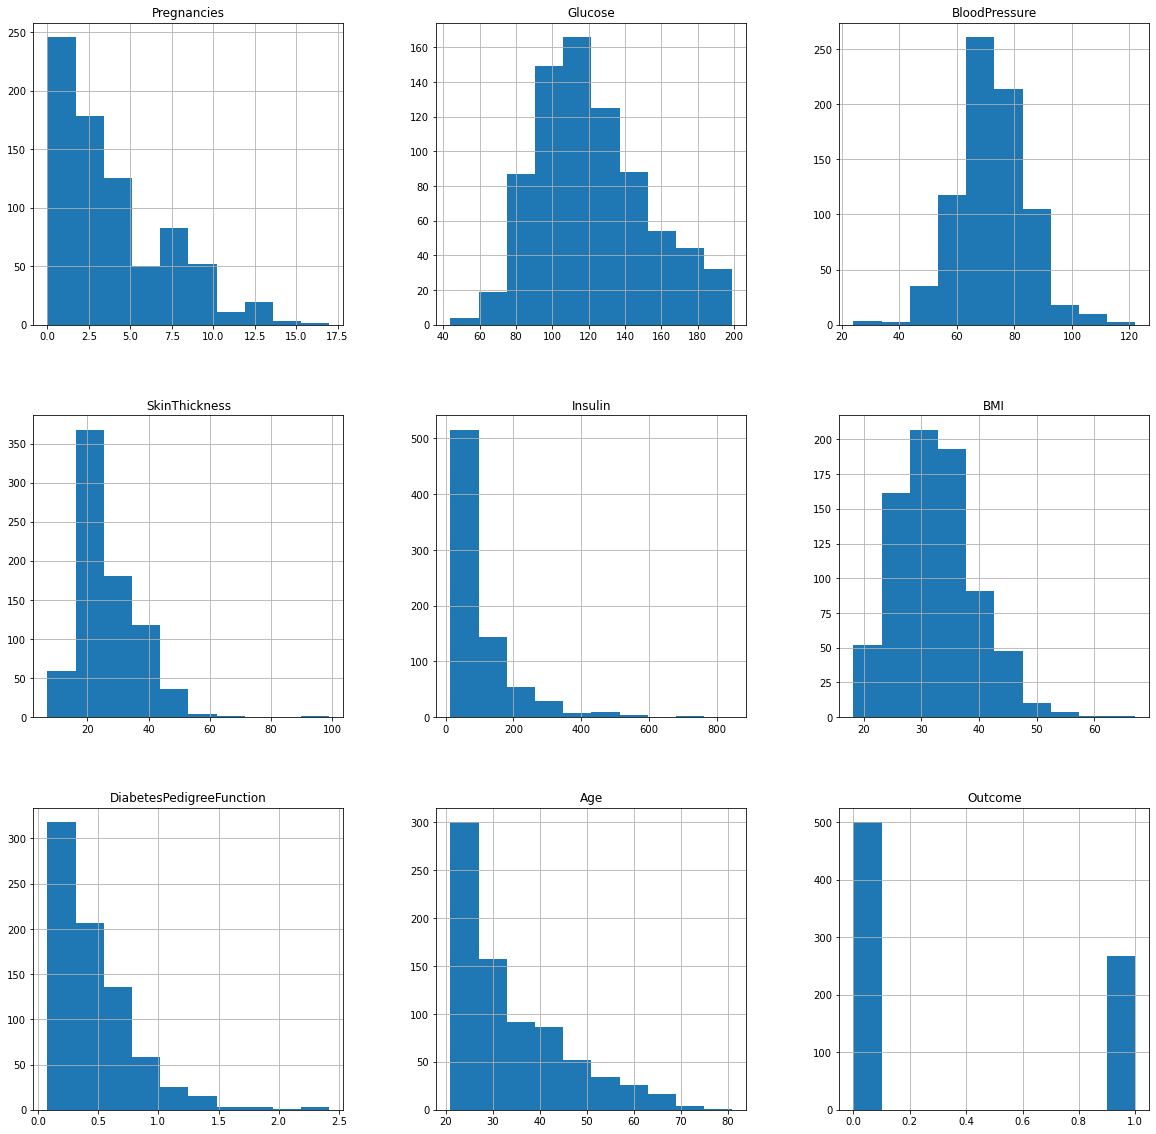

In [18]:
data_set.hist(figsize = (20,20))

In [19]:
OUTCOMES=pd.Series(data_set['Outcome'].value_counts(ascending = False))
OUTCOMES

0    500
1    268
Name: Outcome, dtype: int64

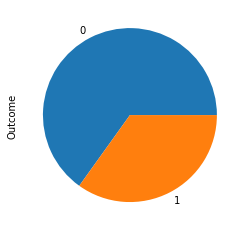

In [20]:
OUTCOMES.plot.pie()

In [21]:
corr = data_set.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


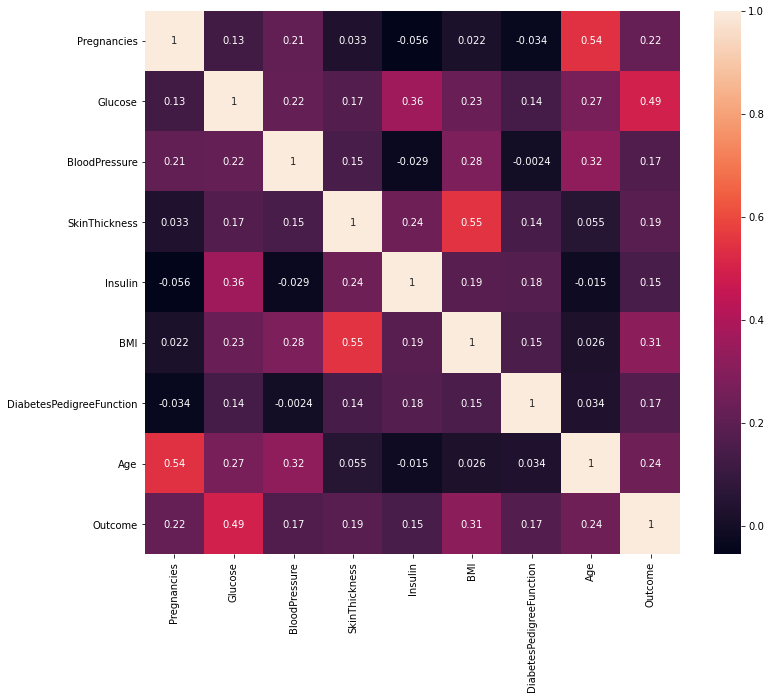

In [22]:
plt.figure(figsize=(12,10))
p=sns.heatmap(corr, annot=True)


# Splitting Data & Feature Scaling

In [23]:
#x-->input(features) 
x=data_set.iloc[:,:-1].values
#y-->output(has diab or not)
y=data_set.iloc[:,-1].values

In [24]:
# Split the training dataset in 2/3 / 1/3
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=42)

In [25]:
# Apply a scaler
scaler = Scaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# train a KNN model

In [26]:
KNN1=KNeighborsClassifier(n_neighbors=14)
KNN1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [27]:
#predict x_test
y_pred_KNN_1=KNN1.predict(x_test)

In [28]:
#show result
cn1=confusion_matrix(y_test,y_pred_KNN_1)
cn1

array([[147,  23],
       [ 40,  46]])

In [29]:
#training better KNN model
KNN2=KNeighborsClassifier(leaf_size=10, n_neighbors=25, p=1,weights='uniform',algorithm='auto')
KNN2.fit(x_train,y_train)
#predict & show result
y_pred_KNN_2=KNN2.predict(x_test)
cn=confusion_matrix(y_test,y_pred_KNN_2)
cn

array([[148,  22],
       [ 38,  48]])

Text(0.5, 1.0, 'Confusion matrix')

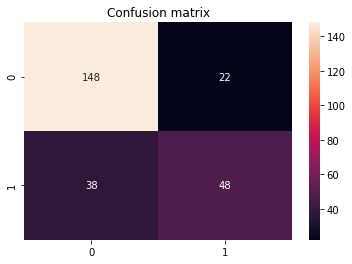

In [30]:
#visualize result
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_KNN_2)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,fmt='g')
plt.title('Confusion matrix')

In [31]:
#classification_report
print(classification_report(y_test,y_pred_KNN_2))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       170
           1       0.69      0.56      0.62        86

    accuracy                           0.77       256
   macro avg       0.74      0.71      0.72       256
weighted avg       0.76      0.77      0.76       256



# train a SVC model

In [32]:
model_svc=SVC(C=10.0,kernel='rbf',gamma='auto')
model_svc.fit(x_train,y_train)
y_pred_SVC=model_svc.predict(x_test)
cn=confusion_matrix(y_test,y_pred_SVC)
cn

array([[143,  27],
       [ 36,  50]])

Text(0.5, 1.0, 'Confusion matrix')

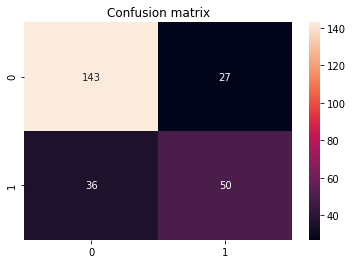

In [33]:
cnf_matrix_2 = metrics.confusion_matrix(y_test, y_pred_SVC)
p = sns.heatmap(pd.DataFrame(cnf_matrix_2), annot=True,fmt='g')
plt.title('Confusion matrix')

In [34]:
print(classification_report(y_test,y_pred_SVC))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       170
           1       0.65      0.58      0.61        86

    accuracy                           0.75       256
   macro avg       0.72      0.71      0.72       256
weighted avg       0.75      0.75      0.75       256



# Test models

In [35]:
#extrnal data
#SVC_model
new_df = pd.DataFrame([[6, 168, 72, 35, 0, 43.6, 0.627, 65]])
new_df_scaled = scaler.transform(new_df)
prediction_SVC_1 = model_svc.predict(new_df_scaled)
prediction_SVC_1

array([1])

In [36]:
#KNN_model
prediction_KNN_1 = KNN2.predict(new_df_scaled)
prediction_KNN_1

array([1])

In [37]:
#random row from data
#SVC_model
row_3 = pd.DataFrame([[1,89,66,23,94,28.1,0.167,21]])
row_3_scaled=scaler.transform(row_3)
prediction_SVC_2 = model_svc.predict(row_3_scaled)
prediction_SVC_2

array([0])

In [38]:
#KNN_model
prediction_KNN_2 = KNN2.predict(row_3_scaled)
prediction_KNN_2

array([0])

# save models

In [39]:
import pickle
Pkl_Filename = "KNN.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(KNN2, file)
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model.predict(x_test)

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [40]:
Pkl_Filename_2 = "SVC.pkl"  

with open(Pkl_Filename_2, 'wb') as file:  
    pickle.dump(model_svc, file)
# Load the Model back from file
with open(Pkl_Filename_2, 'rb') as file:  
    Pickled_LR_Model_2 = pickle.load(file)

Pickled_LR_Model_2.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1])